# DreaMS Atlas

The DreaMS Atlas is a large-scale molecular network containing 201 million MS/MS spectra from the MassIVE GNPS repository, constructed using DreaMS embeddings. Each node in the network corresponds to a mass spectrum derived from a specific biological or environmental sample (e.g., human skin or blood, plant extracts, marine environments, food, and many others). Each edge represents a DreaMS similarity, linking a node to its three nearest neighbors across the entire MassIVE GNPS. This tutorial demonstrates various methods for exploring and analyzing the DreaMS Atlas through a user-friendly API.

<p align="center">
  <img src="https://raw.githubusercontent.com/pluskal-lab/DreaMS/b577db12bc8ec0c2010d10854f528007fcc2db2d/assets/fig_atlas_mini.png" width="100%"/>
</p>

## Initialization

Import all the necessary packages

In [1]:
import networkx as nx
from rdkit import Chem
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dreams.utils.plots as plots
import dreams.utils.spectra as su
from dreams.api import DreaMSAtlas
from dreams.utils.misc import networkx_to_dataframe
from dreams.definitions import *
%reload_ext autoreload
%autoreload 2

Initialize the DreaMS Atlas. Please note that the first initialization involves downloading over 400 GB of data files. However, once the files are downloaded, they accessed directly from the disk, so there’s no need to load all the data into memory, eliminating the requirement for a RAM-intensive machine to work with the Atlas.

<div class="alert alert-success">
ℹ️ In future updates, we plan to develop a web server that will allow access to the DreaMS Atlas from a remote server, removing the need to host all the data locally. Future release will also include the ability to extend the Atlas with new nodes and to query the Atlas using a spectrum of interest by DreaMS similarity.
</div>



In [2]:
atlas = DreaMSAtlas()

Initializing DreaMS Atlas data structures...
Loaded spectral library (79,300 spectra).
Loaded GeMS-C1 dataset (75,520,646 spectra).
Loaded DreaMS Atlas edges (134,524,452 edges).
Loaded DreaMS Atlas nodes representing DreaMS k-NN clusters of GeMS-C1 (33,631,113 nodes).
Loaded LSH clusters of DreaMS Atlas nodes representing GeMS-C (201,223,336 spectra).


## Accesing data from the Atlas

Let's pick one of the 76 million spectra in GeMS-C1 dataset.

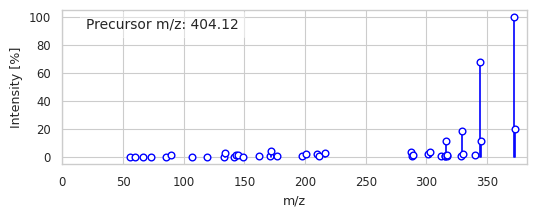

{37552437: {'DreaMS_embedding': array([-0.8768827 , -0.41617227,  0.02967745, ..., -1.2626797 ,
          1.6408856 , -0.64122283], dtype=float32),
  'RT': 550.4616,
  'charge': 1,
  'instrument accuracy est.': 0.00013683233,
  'lsh': -450688754114588762,
  'name': '20160906_pgk965_SloanSurfaceProject_Metabolomics_2-21',
  'precursor_mz': 404.1232,
  'msv_id': 'MSV000086209',
  'msv_species': 'NCBITaxon:2;NCBITaxon:4751',
  'msv_species_resolved': 'Bacteria (NCBITaxon:2)',
  'msv_instrument': nan,
  'msv_instrument_resolved': nan,
  'msv_title': 'GNPS - Microbial and metabolic succession on common building materials under high humidity conditions',
  'msv_description': 'Despite considerable efforts to characterize the microbial ecology of the built environment, the metabolic mechanisms underpinning microbial colonization and successional dynamics remain unclear, particularly at high moisture conditions. Here, we applied bacterial/viral particle counting, qPCR, amplicon sequencing of th

In [27]:
i = 37552437
atlas.get_data(i, plot=True, return_spec=False, msv_metadata=True)

The displayed spectrum represents a single node in the Atlas. In addition to mass spectrometry attributes such as MS/MS peaks, precursor m/z, and retention time, the spectrum is associated with a DreaMS embedding and MassIVE GNPS metadata, which includes, for example, the species studied or the study description.

According to the construction of the DreaMS Atlas, each node represents a cluster of MS/MS spectra obtained using DreaMS and LSH. Let us explore the cluster corresponding to the selected node.

Node 37552437 represents a cluster of 6 spectra with high DreaMS similarity.
Spectrum with index 32730250 further represents an LSH cluster of 1 spectra.
Showing first spectrum:


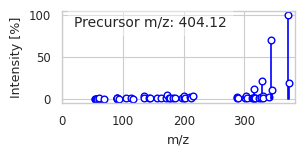

Spectrum with index 32730265 further represents an LSH cluster of 2 spectra.
Showing first spectrum:


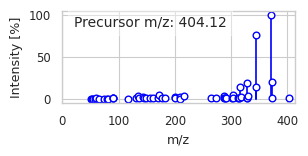

Spectrum with index 32730269 further represents an LSH cluster of 42 spectra.
Showing first spectrum:


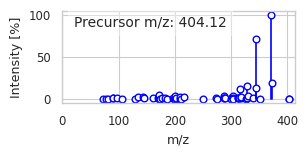

Spectrum with index 37552435 further represents an LSH cluster of 3 spectra.
Showing first spectrum:


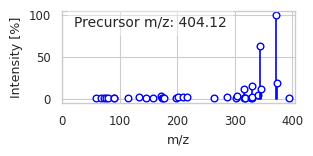

Spectrum with index 37552437 further represents an LSH cluster of 5 spectra.
Showing first spectrum:


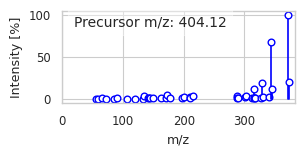

Spectrum with index 37552438 further represents an LSH cluster of 2 spectra.
Showing first spectrum:


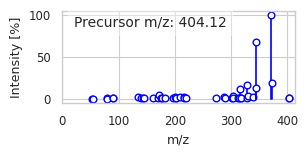

In [28]:
dreams_cluster = atlas.get_node_cluster(i, lsh=True)
print(f'Node {i} represents a cluster of {len(dreams_cluster)} spectra with high DreaMS similarity.')
for spec_i, lsh_cluster in dreams_cluster.items():
    print(f'Spectrum with index {spec_i} further represents an LSH cluster of {len(lsh_cluster)} spectra.')
    print('Showing first spectrum:')
    su.plot_spectrum(lsh_cluster[0][SPECTRUM], prec_mz=lsh_cluster[0][PRECURSOR_MZ], figsize=(3, 1.2))

## Exploring local structure of the Atlas

The DreaMS Atlas API allows for the visualization of a neighborhood of a given node as an interactive graph.

In [1]:
i = 37542683
g_nbhd = atlas.get_neighbors(i, n_hops=3, msv_metadata=True)

plots.plot_nx_graph(
    g_nbhd,
    node_attrs=[PRECURSOR_MZ, NAME, SMILES, 'msv_id'],
    node_color_attr='msv_id',
    special_node=i,
    special_nodes=[n[0] for n in g_nbhd.nodes(data=True) if SMILES in n[1]],
    node_size=12
)

<img src="https://raw.githubusercontent.com/pluskal-lab/DreaMS/3e58c74b9809a46bc41ba1d0d21d680b2aa9a797/assets/atlas_example.gif" width="1000" align="center">

Let’s examine the similarities between three spectra from the neighborhood and our query spectrum of interest. Note that one of the nodes represents an entry from the MoNA spectral library and is therefore annotated with a molecular structure.

Node 37496414


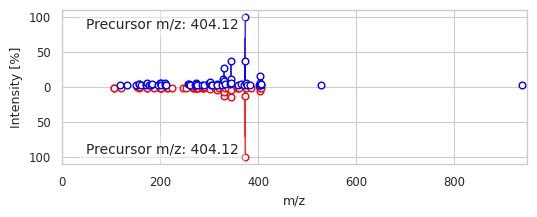

Node 34207


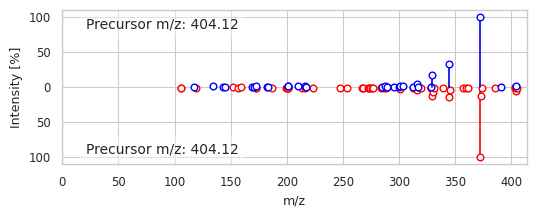

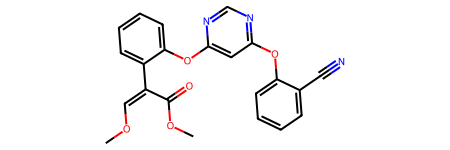

Node 37552437


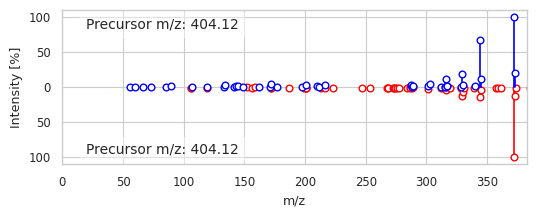

In [37]:
for n in list(g_nbhd.nodes(data=True))[-3:]:
    print('Node', n[0])
    su.plot_spectrum(spec=n[1][SPECTRUM], mirror_spec=g_nbhd.nodes[i][SPECTRUM], prec_mz=n[1][PRECURSOR_MZ], mirror_prec_mz=g_nbhd.nodes[i][PRECURSOR_MZ])
    if SMILES in n[1]:
        display(Chem.MolFromSmiles(n[1][SMILES]))

One can also explore the neighborhood as a `pandas` data frame.

In [47]:
networkx_to_dataframe(g_nbhd).head()

,node_id,RT,msv_keywords,msv_instrument_resolved,msv_create_time,name,msv_species_resolved,id,DreaMS_embedding,msv_instrument,...,msv_species,charge,lsh,msv_description,spectrum,instrument accuracy est.,msv_id,msv_title,neighbors,edge_weight
0,37542683,309.739990,Skin,maXis,2018-07-31 14:41:27.0,BD4_V14_S2-015_arm_psoriasis_BD4_01_14378,Homo sapiens,None,"[-0.10430071, 0.32463387, 1.2688519, 1.7766136...",MS:1001541,...,NCBITaxon:9606,0,-4.529384e+17,GNPS - Skin psoriasis molecular cartography st...,"[[106.06563568115234, 106.07821655273438, 119....",0.000712,MSV000082674,GNPS - Skin psoriasis molecular cartography st...,"[37542661, 37542656, 37648590]","[0.8408746152701184, 0.829488577059148, 0.7978..."
1,37542661,306.300995,"Facial cleanser, skin, temporal",maXis,2018-06-01 15:00:35.0,5A9_%20V1_%20Nose_%20D14H0_%20W7_BA9_01_11583,Homo sapiens,None,"[0.19762689, 0.17532083, 1.2078881, 1.549347, ...",MS:1001541,...,NCBITaxon:9606,0,-4.529386e+17,MS/MS spectra were collected from face of 6 in...,"[[121.03773498535156, 151.0904998779297, 156.0...",0.000614,MSV000082432,GNPS - Colgate facial cleanser longitudinal st...,"[37542653, 32640049, 37542632]","[0.8550434399274379, 0.8537323876318667, 0.851..."
2,37542656,309.917999,Skin,maXis,2018-07-31 14:41:27.0,BD3_V14_S2-014_arm_healthy_BD3_01_14337,Homo sapiens,None,"[0.38015515, -0.5561968, 1.060871, 0.93926096,...",MS:1001541,...,NCBITaxon:9606,0,-4.529386e+17,GNPS - Skin psoriasis molecular cartography st...,"[[119.0505599975586, 134.0594482421875, 145.02...",0.000678,MSV000082674,GNPS - Skin psoriasis molecular cartography st...,"[37542683, 37542627, 37542661]","[0.829488577059148, 0.7041841665583883, 0.6607..."
3,37648590,541.183533,NaN,NaN,2020-09-29 08:10:16.0,20160906_pgk965_SloanSurfaceProject_Metabolomi...,Bacteria (NCBITaxon:2),None,"[-0.18013018, 0.5833932, 1.3610793, 2.4781635,...",NaN,...,NCBITaxon:2;NCBITaxon:4751,1,-4.326744e+17,Despite considerable efforts to characterize t...,"[[89.41886901855469, 89.42453002929688, 96.847...",0.000139,MSV000086209,GNPS - Microbial and metabolic succession on c...,"[32730262, 37542653, 32640049]","[0.8631632498896021, 0.8612309271933151, 0.842..."
4,37542653,349.489990,citrus,maXis 4G,2020-05-15 11:47:12.0,Plate_2_1_820_RE7_01_41664,Citrus sinensis (NCBITaxon:2711),None,"[0.024766939, -0.28584233, 1.1211307, 1.363762...",MS:1002279,...,NCBITaxon:2711,0,-4.529386e+17,Leaf tissues of orange trees extracted with et...,"[[130.02940368652344, 133.05169677734375, 134....",0.000519,MSV000085416,GNPS_UCR_citrus_survivor_study_orchard_samples...,"[32640049, 37496366, 37542658]","[0.8816033077004346, 0.8651546656827798, 0.864..."


## Exploring global structure of the Atlas

The global structure of the DreaMS Atlas can be analyzed in two ways. First, one can efficiently analyze the graph by accessing its adjacency matrix, which is stored as a sparse array. For example, let’s plot the distribution of the DreaMS similarities representing the graph edges.

Adjacency matrix shape: (33631113, 33631113)
Number of edges: 101104558


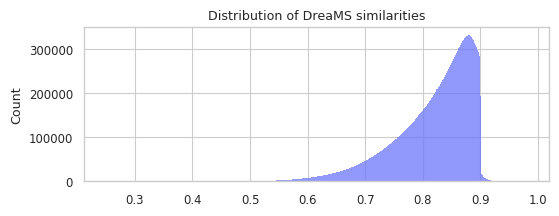

In [10]:
A = atlas.csrknn.csr
print('Adjacency matrix shape:', A.shape)
edges = np.asarray(A[A > 0]).ravel()

print('Number of edges:', len(edges))
sns.histplot(edges)
plt.title('Distribution of DreaMS similarities')
plt.show()

Second, one can work with the Atlas as an `igraph` graph object, leveraging the many graph analysis methods implemented within the `igraph` package. For example, let’s plot the distribution of node degrees across the entire Atlas.

In [38]:
G = atlas.csrknn.to_graph()

Retrieving graph edges: 100%|██████████| 33631113/33631113 [03:09<00:00, 177295.81it/s]


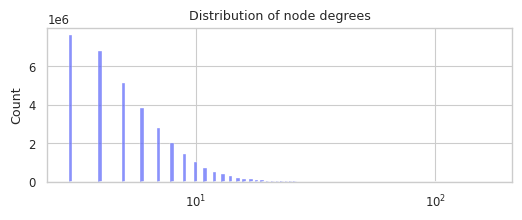

In [48]:
degrees = G.degree()
sns.histplot(degrees, log_scale=True, shrink=10)
plt.title('Distribution of node degrees')
plt.show()